# TM351 - Data Management and Analysis

 Student: Osamah Hussein Bazarh       
 Id: 21414103         
 Section: 1201

<div class="alert alert-success""fs-1" >
    <h2>TMA 2023/2024 Spring</h1>
</div>

 

### Question 1

Question 1 will be solved in the Q1.Solved-Notebooks.rar file

### Question 2/3 

### Important libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Load the dataset
loan_data = pd.read_csv("loan_data.csv")

In [41]:
# This method will output the first 5 rows of the data set
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [50]:
# This method prints the amount of rows and columns
loan_data.shape

(381, 13)

In [51]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


### Let's proceed with basic exploratory data analysis

### Null Values

In [52]:
#First, check for missing values
missing_values = loan_data.isnull().sum()
missing_values

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
# Summary statistics for numerical variables
numerical_summary = loan_data.describe()
numerical_summary

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [54]:
# Summary of categorical variables
categorical_summary = loan_data.describe(include=['O'])
categorical_summary

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,381,376,381,373,381,360,381,381
unique,381,2,2,4,2,2,3,2
top,LP001003,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,291,228,234,278,325,149,271


In [55]:
# Calculate the percentage of missing values for each column
missing_percentage = (loan_data.isnull().sum() / len(loan_data)) * 100

missing_percentage


Loan_ID              0.000000
Gender               1.312336
Married              0.000000
Dependents           2.099738
Education            0.000000
Self_Employed        5.511811
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.887139
Credit_History       7.874016
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### Now let's start analyzing the univariant variables

In [56]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [57]:
# Select only the columns with object data type 
categorical_columns = loan_data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [58]:
#Select all numerical columns
numerical_columns=loan_data.select_dtypes(include=['float','int64']).columns
print(numerical_columns)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


#### Now let's start visualizing the univariant columns

<Axes: xlabel='Gender'>

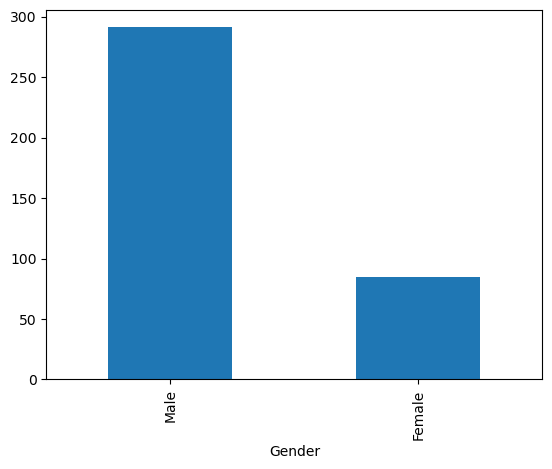

In [59]:
loan_data['Gender'].value_counts().plot(kind='bar')

We can see here that the Male applicants are much more than Female applicants

<Axes: xlabel='Married'>

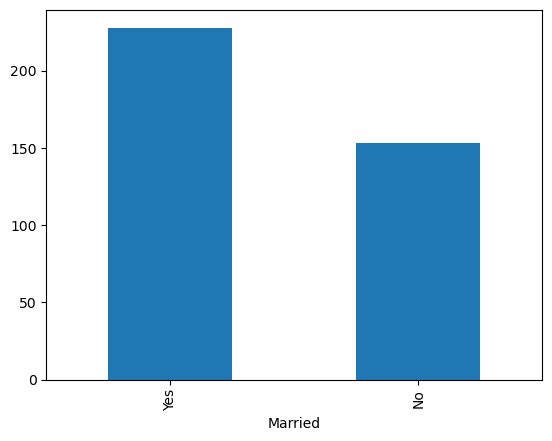

In [60]:
loan_data['Married'].value_counts().plot(kind='bar')

Married applicants are slightly more than unmarried applicants

<Axes: xlabel='Dependents'>

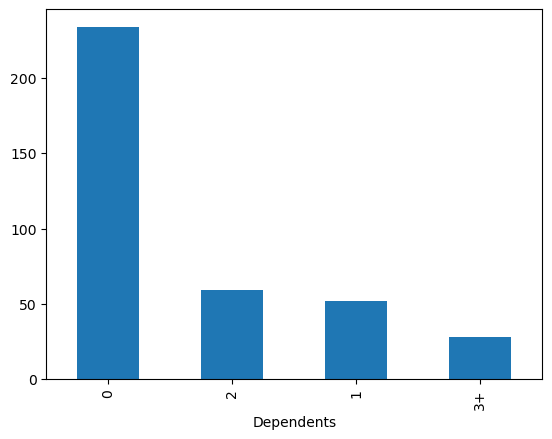

In [61]:
loan_data['Dependents'].value_counts().plot(kind='bar')

Applicants with 0 dependents are way more than those with 1 or more dependents

<Axes: xlabel='Education'>

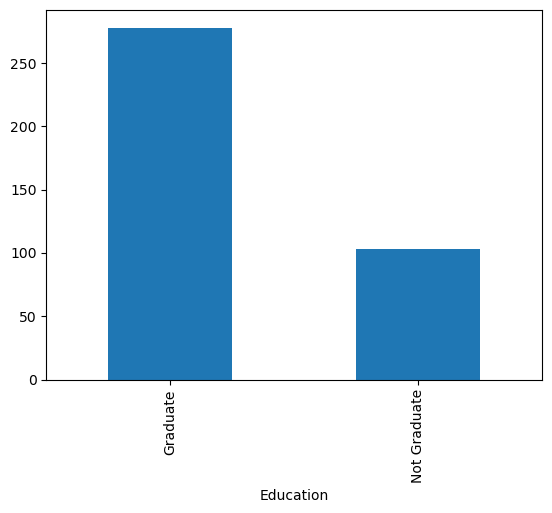

In [62]:
loan_data['Education'].value_counts().plot(kind='bar')

<Axes: xlabel='Self_Employed'>

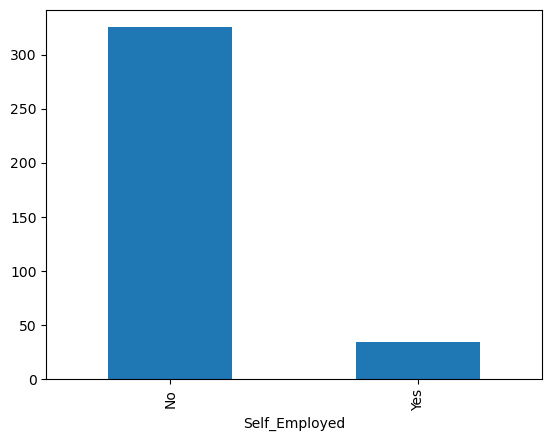

In [63]:
loan_data['Self_Employed'].value_counts().plot(kind='bar')

Not self employed applicants are way more than those who are self employed

<Axes: xlabel='Property_Area'>

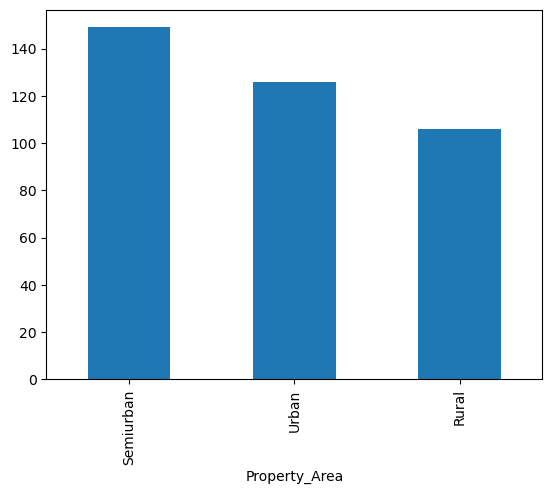

In [64]:
loan_data['Property_Area'].value_counts().plot(kind='bar')

It seems that the property area does not have that big of impact on the loan application but regardless Semiurban areas
has slightly more applicants than Urban and Rural

<Axes: xlabel='Loan_Status'>

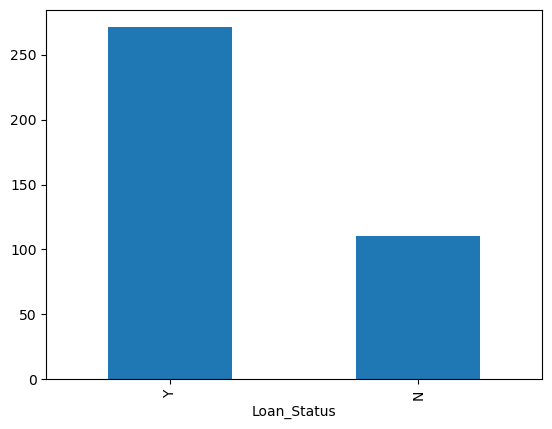

In [65]:
loan_data['Loan_Status'].value_counts().plot(kind='bar')

Approved loans are way more than not approved loans

## Numerical Values

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

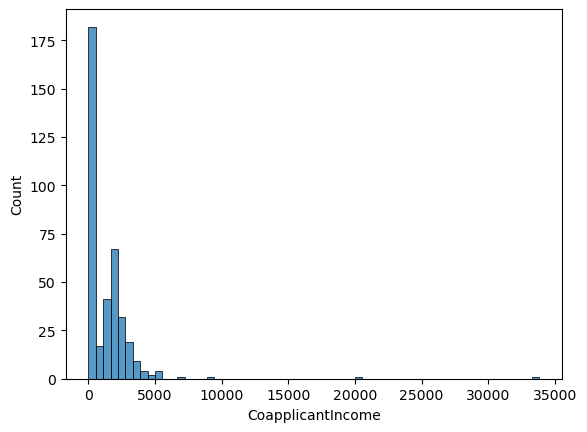

In [66]:
sns.histplot(loan_data['CoapplicantIncome'])

<Axes: xlabel='CoapplicantIncome'>

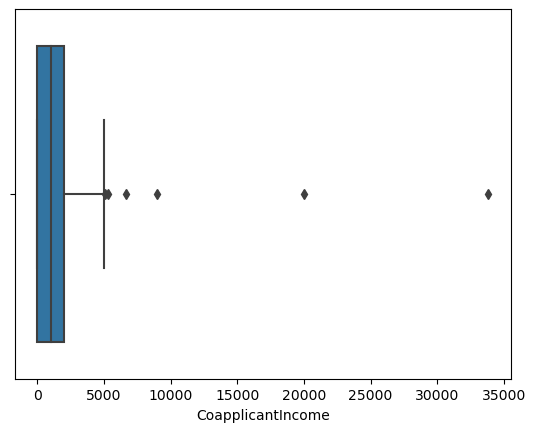

In [67]:
sns.boxplot(x=loan_data['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

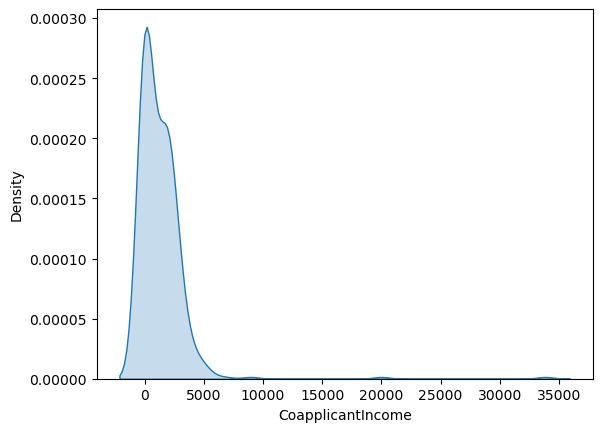

In [68]:
sns.kdeplot(loan_data['CoapplicantIncome'],fill=True)


<Axes: xlabel='LoanAmount', ylabel='Count'>

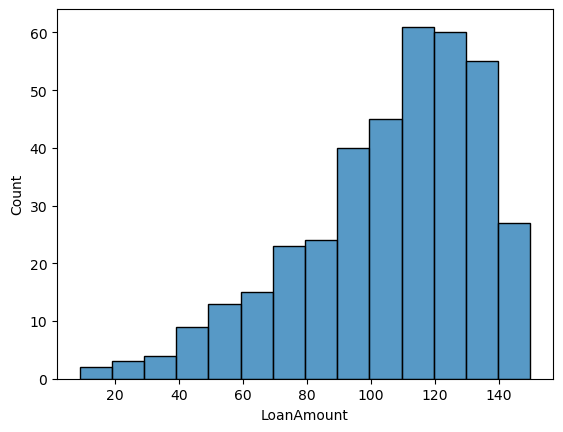

In [69]:
sns.histplot(loan_data['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

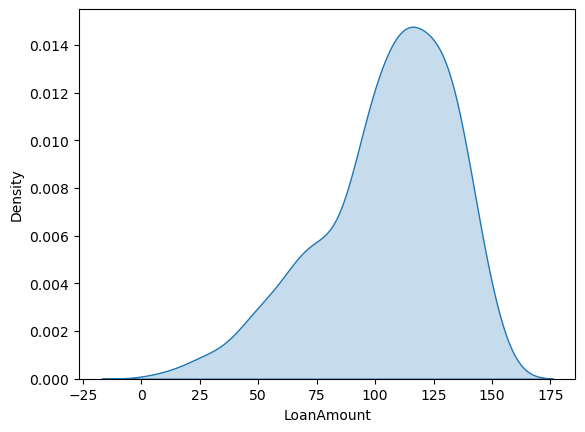

In [70]:
sns.kdeplot(loan_data['LoanAmount'],fill=True)


<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

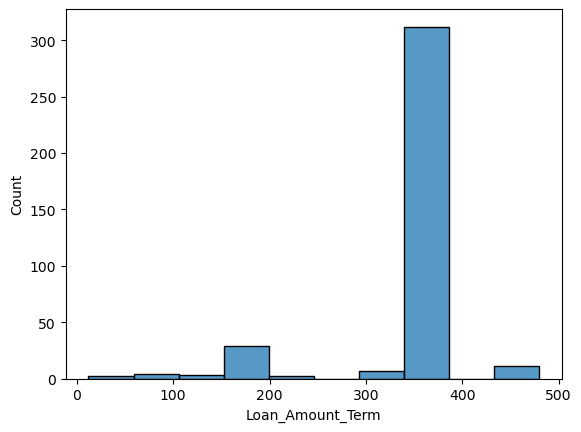

In [71]:
sns.histplot(loan_data['Loan_Amount_Term'])


<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

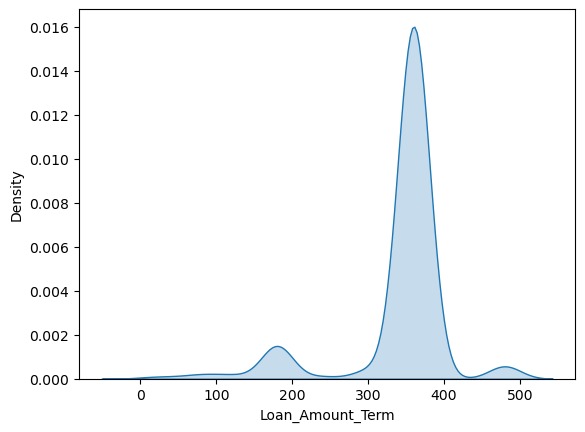

In [72]:
sns.kdeplot(loan_data['Loan_Amount_Term'],fill=True)


<Axes: xlabel='Credit_History'>

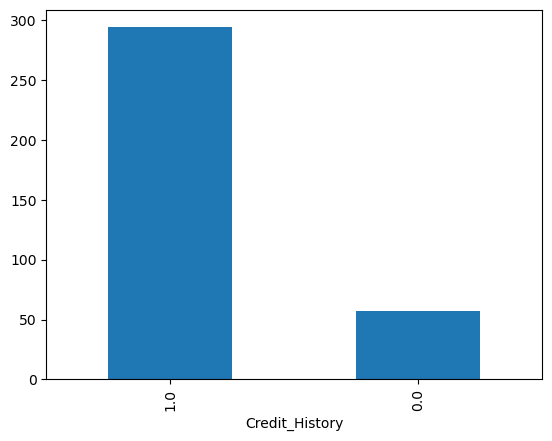

In [73]:
loan_data['Credit_History'].value_counts().plot(kind='bar')


### Lets start analyzing the relationships

in the next cells i will provide the relationship between Loan Amount and Loan Amount Term

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

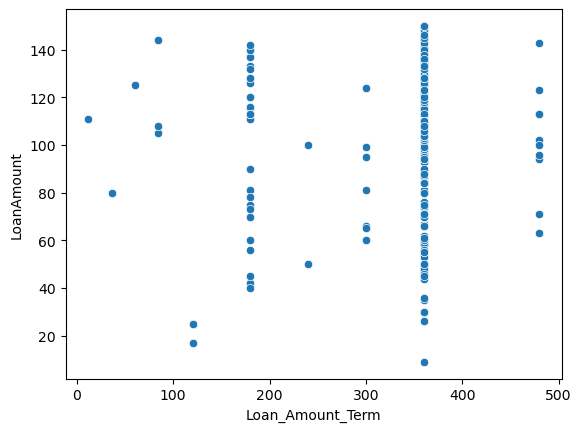

In [74]:
sns.scatterplot(y='LoanAmount',x='Loan_Amount_Term',data=loan_data)


The scatterplot provided shows two variables: LoanAmount on the y-axis and Loan_Amount_Term on the x-axis. This type of plot is used to identify the relationship between two quantitative variables.

From observing the plot, it appears that there isn't a strong linear relationship between the loan amount and the loan amount term, as the points do not form a clear pattern as they are spread out across the plot. However, there are a couple of notable observations:

Concentration of Data Points: There is a heavy concentration of data points along the vertical axis around the 360-term mark. This suggests that a 360-term (360 months, which is 30 years, a common mortgage term) is very common in the dataset for a wide range of loan amounts.

Variability of Loan Amount: The loan amount shows variability independent of the loan term, with most loan amounts being clustered under 100, but with some loans extending up to around 140.

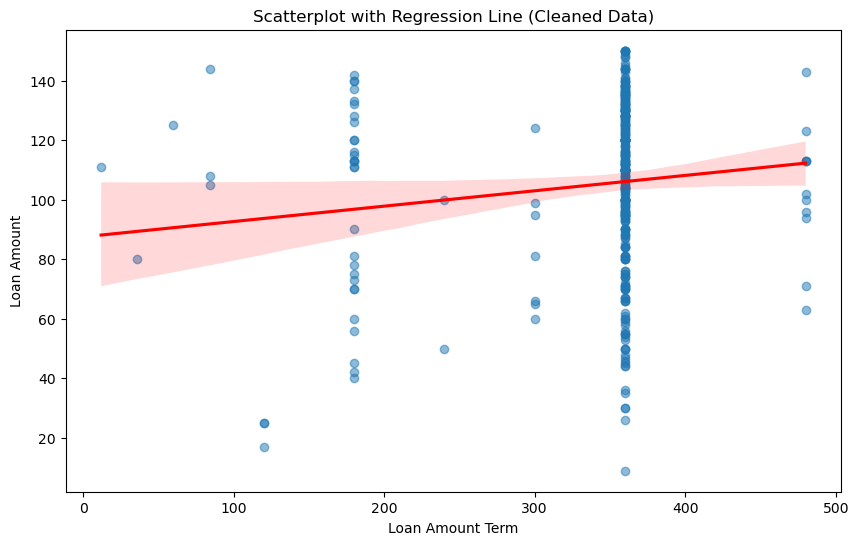

Correlation_Coefficient=  0.12357886584823258 P_Value=  0.017398979069414677


In [75]:
from scipy.stats import pearsonr
# Dropping rows where either 'LoanAmount' or 'Loan_Amount_Term' is NaN to ensure equal lengths
loan_data_clean = loan_data.dropna(subset=['LoanAmount', 'Loan_Amount_Term'])

# Calculate the Pearson correlation coefficient between 'LoanAmount' and 'Loan_Amount_Term' after cleaning
correlation_coefficient, p_value = pearsonr(loan_data_clean['LoanAmount'], loan_data_clean['Loan_Amount_Term'])

# Let's create a scatterplot with a regression line to visualize the relationship after cleaning the data
plt.figure(figsize=(10,6))
sns.regplot(x='Loan_Amount_Term', y='LoanAmount', data=loan_data_clean, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatterplot with Regression Line (Cleaned Data)')
plt.xlabel('Loan Amount Term')
plt.ylabel('Loan Amount')

# Show the plot
plt.show()

# Output the correlation coefficient and p-value
print("Correlation_Coefficient= ",correlation_coefficient,"P_Value= ",p_value)



Correlation Coefficient (0.124): This value indicates a very weak positive linear relationship between the loan amount and the loan term. A value of 1 would mean a perfect positive correlation, -1 a perfect negative correlation, and 0 no correlation at all. Since the coefficient is closer to 0 than to 1 or -1, it implies that as the loan term increases, there's a slight tendency for the loan amount to increase, but this tendency is not strong.

P-Value (0.017): The p-value measures the probability that the observed correlation is due to chance if the true correlation is zero. A common threshold for significance is 0.05. Since 0.017 is less than 0.05, we can say that there is statistically significant evidence to suggest that the correlation is not zero. However, it's important to remember that 'statistically significant' does not necessarily mean 'practically significant.' The relationship, while statistically detectable, is not strong.

The scatterplot with the regression line further illustrates this relationship. The regression line is slightly upward-sloping, indicating the weak positive trend. However, the spread of data points around the line is large, reflecting the weak correlation.

## Relationship between Loan Amount and Loan Status

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

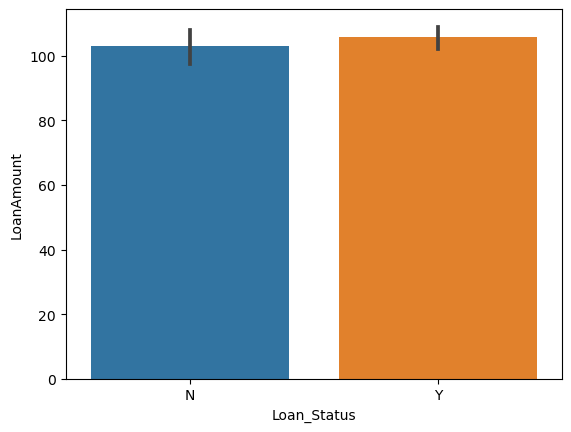

In [76]:
sns.barplot(x=loan_data['Loan_Status'],y=loan_data['LoanAmount'])

The bar chart provided compares the average LoanAmount for two categories of Loan_Status: 'N' (meaning the loan was not approved) and 'Y' (meaning the loan was approved).

From the chart, it appears that the average loan amount for loans that were not approved ('N') is slightly lower than the average loan amount for loans that were approved ('Y'). However, the difference does not seem to be very large, as indicated by the proximity of the bar heights. Additionally, there are error bars on top of each bar, which suggest there is variability within each group, and these error bars appear to overlap.

In [77]:
from scipy.stats import ttest_ind

# Grouping the data by 'Loan_Status' and calculating means and standard deviations
grouped_data = loan_data.groupby('Loan_Status')['LoanAmount']

# Get the loan amounts for each loan status category
loan_amount_n = loan_data[loan_data['Loan_Status'] == 'N']['LoanAmount'].dropna()
loan_amount_y = loan_data[loan_data['Loan_Status'] == 'Y']['LoanAmount'].dropna()

# Perform an independent t-test between the two groups
t_stat, p_val = ttest_ind(loan_amount_n, loan_amount_y, equal_var=False) # Assume unequal variance

# Let's also calculate the means and standard deviations for each group for a more detailed interpretation
mean_n = loan_amount_n.mean()
mean_y = loan_amount_y.mean()
std_n = loan_amount_n.std()
std_y = loan_amount_y.std()

(mean_n, std_n), (mean_y, std_y), (t_stat, p_val)
print("Mean loan amout for N= ",mean_n,"Standard deviation for N= ",std_n)
print("Mean loan amout for Y= ",mean_y,"Standard deviation for Y= ",std_y)
print("The T-statistic= ",t_stat," The P_value",p_val)

Mean loan amout for N=  103.15454545454546 Standard deviation for N=  27.677098260838626
Mean loan amout for Y=  105.73062730627306 Standard deviation for Y=  28.647366616313505
The T-statistic=  -0.8149488329748902  The P_value 0.4160315111856173


The mean loan amount for the 'N' group (loans not approved) is approximately 103.15 with a standard deviation of 27.68.

The mean loan amount for the 'Y' group (loans approved) is approximately 105.73 with a standard deviation of 28.65.

The t-statistic is approximately -0.815, and the p-value is about 0.416.

The p-value is much greater than the conventional threshold of 0.05 for statistical significance, suggesting that there is no statistically significant difference in the average loan amounts between the two groups. In other words, the data does not provide strong evidence to conclude that the loan amounts differ between approved and not approved loans.

## Relationship between Co-Applicant Income and Loan Status

 Let's start investigating the relationship between CoapplicantIncome and Loan_Status, I'll start by examining the correlation between CoapplicantIncome and the binary outcome Loan_Status (where "Y" indicates loan approval and "N" indicates rejection). Since Loan_Status is a categorical variable, we'll use a measure of association suitable for a numeric-categorical analysis. One common approach is to convert Loan_Status to a numeric format (e.g., 1 for "Y" and 0 for "N") and then compute a point-biserial correlation coefficient. Additionally, I'll provide appropriate visualizations to aid in understanding their relationship. Let's begin with the correlation analysis.


In [78]:
from scipy.stats import pointbiserialr

# Convert Loan_Status to numeric (1 for Y and 0 for N)
loan_data['Loan_Status_Numeric'] = loan_data['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)

# Calculate the point-biserial correlation coefficient
correlation = pointbiserialr(loan_data['CoapplicantIncome'], loan_data['Loan_Status_Numeric'])

correlation_coefficient, p_value = correlation
correlation_coefficient, p_value


(0.00901651933108755, 0.860749064192552)

The point-biserial correlation coefficient between CoapplicantIncome and Loan_Status (converted to numeric format) is approximately 0.009, with a p-value of 0.861. This correlation coefficient is very close to zero, suggesting there is a negligible linear relationship between CoapplicantIncome and whether a loan is approved or not according to this dataset. The high p-value further indicates that this result is not statistically significant, meaning we do not have evidence to suggest a meaningful association between these two variables.

Next, I'll create visualizations to further explore this relationship, including a box plot to compare CoapplicantIncome distributions across the two loan status groups.

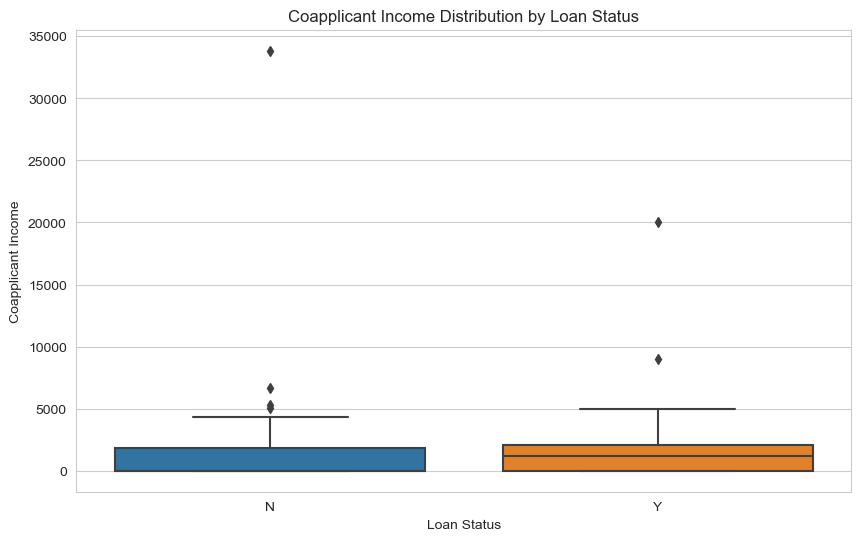

In [79]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a box plot to compare CoapplicantIncome distributions across Loan_Status groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=loan_data)
plt.title('Coapplicant Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Coapplicant Income')
plt.show()


The box plot illustrates the distribution of CoapplicantIncome across different Loan_Status groups. As visible, both groups ("Y" for loans approved and "N" for loans not approved) have a wide range of coapplicant incomes with a substantial amount of outliers indicating higher coapplicant incomes. The central tendency (median) and spread (interquartile range) appear to be quite similar across both groups, which aligns with the negligible correlation coefficient previously calculated.

This visualization supports the conclusion that there is no strong visible trend indicating a relationship between CoapplicantIncome and loan approval status based on this dataset. The overlap in income distributions suggests that coapplicant income, by itself, may not be a decisive factor in loan approval decisions.

## Relationship between Credit History and Loan Status

To investigate the relationship between Credit_History and Loan_Status, given both are categorical variables (with Credit_History being binary as well, indicating whether a person has a history of good credit), we'll approach this by analyzing how loan approval rates differ among applicants with and without a good credit history. Since we're dealing with categorical data, we'll use the Chi-square test of independence to evaluate the relationship. This will tell us if there's a statistically significant association between an applicant's credit history and their loan approval status.

Afterwards, I'll provide a visualization that illustrates the relationship between these two variables, likely in the form of a bar plot showing the proportion of loan approvals versus rejections for each category of credit history. Let's start with the Chi-square test.

In [83]:
from scipy.stats import chi2_contingency

# Your code that uses chi2_contingency follows here

# Create a contingency table of Credit_History and Loan_Status
contingency_table = pd.crosstab(loan_data['Credit_History'], loan_data['Loan_Status'])

# Perform the Chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value, dof, expected


(130.8317590641023,
 2.6950674218837062e-30,
 1,
 array([[ 17.21367521,  39.78632479],
        [ 88.78632479, 205.21367521]]))

The Chi-square test of independence yields a χ² value of approximately 130.83 with a p-value of 2.70×10−30
  and 1 degree of freedom. The extremely low p-value indicates a highly significant statistical association between Credit_History and Loan_Status. This suggests that an applicant's credit history is likely to be an important factor in loan approval decisions within this dataset.

The expected frequencies, calculated as part of the Chi-square test, indicate how many observations would be expected in each category if there were no association between Credit_History and Loan_Status. The significant difference between observed and expected frequencies underlines the strength of the association.

Next, let's visualize this relationship with a bar plot to better understand the proportion of loan approvals versus rejections for each credit history category. ​

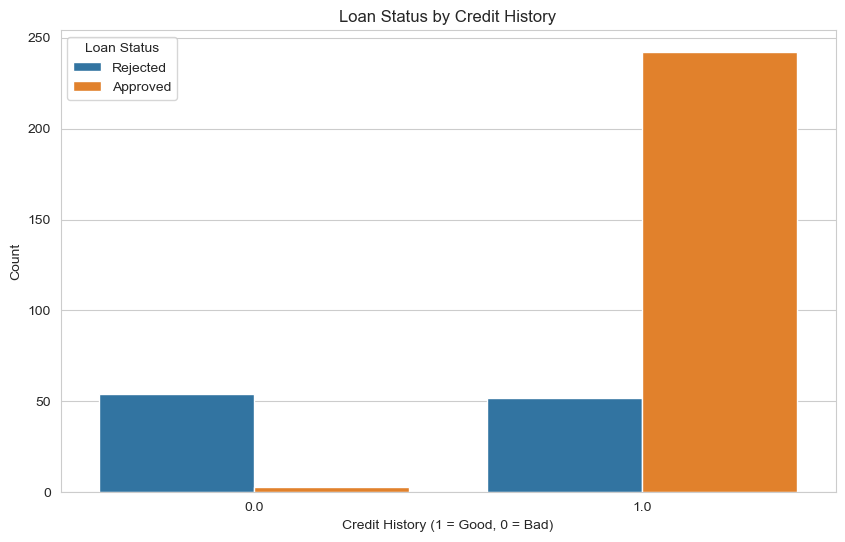

In [84]:
# Create a bar plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=loan_data)
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History (1 = Good, 0 = Bad)')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.show()


The bar plot clearly illustrates the relationship between Credit_History and Loan_Status. Applicants with a good credit history (indicated as 1) have a significantly higher number of loan approvals compared to rejections. Conversely, those with a bad credit history (indicated as 0) show a trend towards more loan rejections.

This visualization, coupled with the results from the Chi-square test, strongly suggests that credit history is a pivotal factor in the loan approval process within this dataset. The data demonstrates that applicants with a good credit history are more likely to be approved for a loan, highlighting the importance of maintaining a positive credit record for potential borrowers.

## Relationship between Dependents and Loan Status

let's examine the relationship between the number of dependents (Dependents) and Loan_Status using a Chi-square test for independence to evaluate their association. Afterward, we'll visualize this relationship.

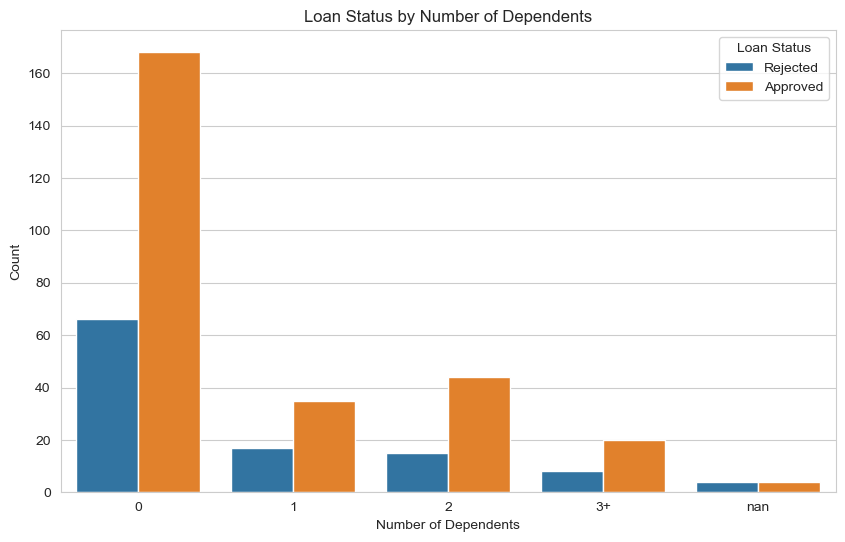

(None, 2.5020689501879687, 0.6442653537042111)

In [87]:
# Before performing the Chi-square test, let's ensure 'Dependents' data type and content
loan_data['Dependents'].value_counts()

# Convert 'Dependents' to a string type to handle it as a categorical variable consistently
loan_data['Dependents'] = loan_data['Dependents'].astype(str)

# Create a contingency table of Dependents and Loan_Status
contingency_table_dependents = pd.crosstab(loan_data['Dependents'], loan_data['Loan_Status'])

# Perform the Chi-square test of independence for Dependents and Loan_Status
chi2_dependents, p_value_dependents, dof_dependents, expected_dependents = chi2_contingency(contingency_table_dependents)

# Visualize the relationship between Dependents and Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Dependents', hue='Loan_Status', data=loan_data, order=sorted(loan_data['Dependents'].unique()))
plt.title('Loan Status by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Rejected', 'Approved'])
plt.show(), chi2_dependents, p_value_dependents


The Chi-square test for the relationship between the number of dependents (Dependents) and Loan_Status yielded a χ² value of approximately 2.50 with a p-value of 0.644. This indicates that there is no statistically significant association between the number of dependents an applicant has and the outcome of their loan application in this dataset. The p-value suggests that any observed differences in loan approval rates across different numbers of dependents are likely due to chance.

The visualization further illustrates this point, showing the count of loan approvals and rejections across different categories of dependents. The distribution does not show a clear pattern that distinguishes loan approval rates significantly by the number of dependents, which is consistent with the statistical test results.

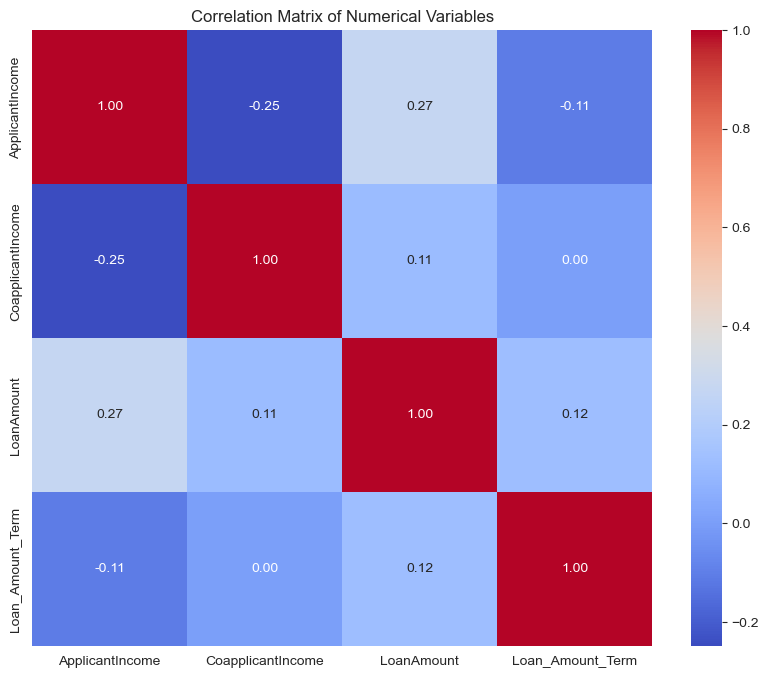

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'loan_data' is your DataFrame
correlation_matrix = loan_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [89]:
# Generate crosstabs for the specified comparisons
crosstabs = {
    'Gender': pd.crosstab(loan_data['Loan_Status'], loan_data['Gender'], margins=True),
    'Married': pd.crosstab(loan_data['Loan_Status'], loan_data['Married'], margins=True),
    'Education': pd.crosstab(loan_data['Loan_Status'], loan_data['Education'], margins=True),
    'Self_Employed': pd.crosstab(loan_data['Loan_Status'], loan_data['Self_Employed'], margins=True),
    'Credit_History': pd.crosstab(loan_data['Loan_Status'], loan_data['Credit_History'], margins=True),
    'Property_Area': pd.crosstab(loan_data['Loan_Status'], loan_data['Property_Area'], margins=True),
    'Dependents':pd.crosstab(loan_data['Loan_Status'], loan_data['Dependents'], margins=True)
  
}

crosstabs


{'Gender': Gender       Female  Male  All
 Loan_Status                   
 N                26    80  106
 Y                59   211  270
 All              85   291  376,
 'Married': Married       No  Yes  All
 Loan_Status               
 N             52   58  110
 Y            101  170  271
 All          153  228  381,
 'Education': Education    Graduate  Not Graduate  All
 Loan_Status                             
 N                  76            34  110
 Y                 202            69  271
 All               278           103  381,
 'Self_Employed': Self_Employed   No  Yes  All
 Loan_Status                 
 N               95   11  106
 Y              230   24  254
 All            325   35  360,
 'Credit_History': Credit_History  0.0  1.0  All
 Loan_Status                  
 N                54   52  106
 Y                 3  242  245
 All              57  294  351,
 'Property_Area': Property_Area  Rural  Semiurban  Urban  All
 Loan_Status                                
 N  

## Question 4

in this question I chose medical costs data set

In [90]:

insurance_df=pd.read_csv("insurance.csv")

In [91]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [92]:
insurance_df.shape

(1338, 7)

In [93]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset contains information across 7 columns, with a total of 1,338 entries. Here's a brief overview of each column:

age: Numerical (int64), non-null, represents the age of the insured.

sex: Categorical (object), non-null, indicates the gender of the insured (e.g., male, female).

bmi: Numerical (float64), non-null, represents the body mass index of the insured.

children: Numerical (int64), non-null, indicates the number of children/dependents covered by the insurance.

smoker: Categorical (object), non-null, indicates whether the insured is a smoker (yes, no).

region: Categorical (object), non-null, represents the region where the insured resides (e.g., northeast, northwest, southeast,
southwest).

charges: Numerical (float64), non-null, represents the insurance charges.

The dataset has no missing values in any of the columns.

In [94]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [95]:
# Get statistical summary of the dataset
statistical_summary = insurance_df.describe(include='all')
statistical_summary


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


## Here's a statistical summary of the dataset, including both numerical and categorical variables:
## Numerical Variables


### Age:

Count: 1338

Mean: 39.21 years

Standard Deviation: 14.05 years

Minimum: 18 years

25th Percentile: 27 years

Median (50th Percentile): 39 years

75th Percentile: 51 years

Maximum: 64 years

### bmi:

Count: 1338

Mean: 30.66

Standard Deviation: 6.10

Minimum: 15.96

25th Percentile: 26.30

Median (50th Percentile): 30.40

75th Percentile: 34.69

Maximum: 53.13

### children:

Count: 1338

Mean: 1.09

Standard Deviation: 1.21

Minimum: 0

25th Percentile: 0

Median (50th Percentile): 1

75th Percentile: 2

Maximum: 5
 
### charges:

Count: 1338

Mean: $13,270.42

Standard Deviation: $12,110.01

Minimum: $1,121.87

25th Percentile: $4,740.29

Median (50th Percentile): $9,382.03

75th Percentile: $16,639.91

Maximum: $63,770.43

## Categorical Variables

### sex:

Count: 1338

Unique: 2 (male, female)

Top: male (676 occurrences)


### smoker:

Count: 1338

Unique: 2 (yes, no)

Top: no (1064 occurrences)


### region:

Count: 1338

Unique: 4 (northeast, northwest, southeast, southwest)

Top: southeast (364 occurrences)

## Pairwise Correlations

In [96]:
# Perform one-hot encoding for categorical variables
insurance_encoded_df = pd.get_dummies(insurance_df, drop_first=True)

# Calculate pairwise correlation of all (now numeric) columns
pairwise_correlation_all_columns = insurance_encoded_df.corr()
pairwise_correlation_all_columns


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


The pairwise correlation across all columns, including the one-hot encoded categorical variables, reveals the following insights:

Charges and smoker_yes: The strongest correlation in the dataset is between charges and smoker_yes with a coefficient of approximately 0.787, indicating a strong positive correlation. This suggests that being a smoker is significantly associated with higher insurance charges.

Charges and other variables: The correlation of charges with age (0.299) and bmi (0.198) also shows moderate positive relationships, suggesting that older individuals and those with higher BMI tend to have higher insurance charges.

Categorical variables (sex, region) and charges: The correlations between sex_male, region_northwest, region_southeast, region_southwest and charges are relatively weak. This indicates that while gender and region may influence insurance charges, their impact is less pronounced compared to factors like smoking status, age, and BMI.

Categorical variables and other factors: The correlation between categorical variables and other factors such as age, bmi, and children also tends to be weak, suggesting that these characteristics do not strongly differentiate based on sex or region.

These correlations can provide insights into the factors that are most strongly associated with insurance charges and how different attributes relate to each other within the dataset. 


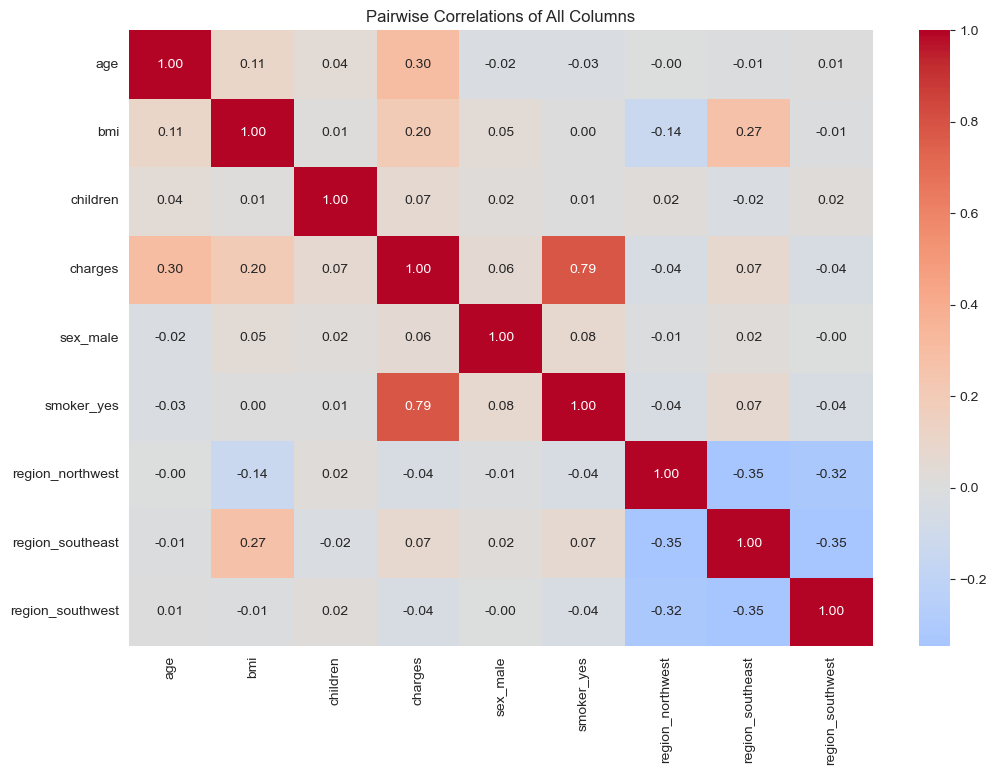

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = insurance_encoded_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.title('Pairwise Correlations of All Columns')
plt.show()
